In [9]:
import requests

def download_content(url, save_path):
  try:
    url = url.lstrip()
    resp = requests.get(url)
    resp.raise_for_status()

    with open(save_path, "wb") as f:
      f.write(resp.content)
    print(f"Downloaded {url} to {save_path}")

  except requests.exceptions.RequestException as e:
    print(f"Error while downloading {url}: {e}")

def download_frm_file(file_path, op_folder):
  with open(file_path, 'r') as f:
    urls = f.readlines()
  img_paths = []
  for i, url in enumerate(urls):
    url = url.strip()
    save_path = f"{op_folder}/sidewalk_{i+1}.jpg"
    img_paths.append(save_path)
    download_content(url, save_path)
  return img_paths

file_path = "/content/venice_sidewalk_cafe_imgs.txt"
op_folder = "/content/venice_imgs"
!mkdir /content/venice_imgs
img_paths = download_frm_file(file_path, op_folder)

mkdir: cannot create directory ‘/content/venice_imgs’: File exists
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk1.jpg to /content/venice_imgs/sidewalk_1.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk2.jpg to /content/venice_imgs/sidewalk_2.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk3.jpg to /content/venice_imgs/sidewalk_3.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk4.jpg to /content/venice_imgs/sidewalk_4.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk5.jpg to /content/venice_imgs/sidewalk_5.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk6.jpg to /content/venice_imgs/sidewalk_6.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk7.jpg to /content/venice_imgs/sidewalk_7.jpg
Downloaded https://data.heatonresearch.com/data/t81-558/sidewalk/sidewalk8.jpg to /content/venice_imgs/side

In [10]:
img_paths

['/content/venice_imgs/sidewalk_1.jpg',
 '/content/venice_imgs/sidewalk_2.jpg',
 '/content/venice_imgs/sidewalk_3.jpg',
 '/content/venice_imgs/sidewalk_4.jpg',
 '/content/venice_imgs/sidewalk_5.jpg',
 '/content/venice_imgs/sidewalk_6.jpg',
 '/content/venice_imgs/sidewalk_7.jpg',
 '/content/venice_imgs/sidewalk_8.jpg',
 '/content/venice_imgs/sidewalk_9.jpg',
 '/content/venice_imgs/sidewalk_10.jpg']

In [11]:
import sys

!git clone https://github.com/ultralytics/yolov5 --tag 6.2
!mv /content/6.2 /content/yolov5
%pip install -qr /content/yolov5/requirements.txt  # install
sys.path.insert(0,'/content/yolov5')

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/107.7 GB disk)


detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/venice_imgs/, data=yolov5/data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.1, iou_thres=0.25, max_det=1000, device=, view_img=False, save_txt=False, save_csv=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/10 /content/venice_imgs/sidewalk_1.jpg: 576x1024 17 persons, 5 cars, 2 motorcycles, 1 bus, 1 boat, 2 umbrellas, 6 suitcases, 1520.7ms
image 2/10 /content/venice_imgs/sidewalk_10.jpg: 576x1024 28 persons, 2 bicycles, 1 motorcycle, 1 dog, 1 suitcase, 1361.4ms
image 3/10 /content/venice_imgs/sidewalk_2.jpg: 576x1024 27 persons, 5 car

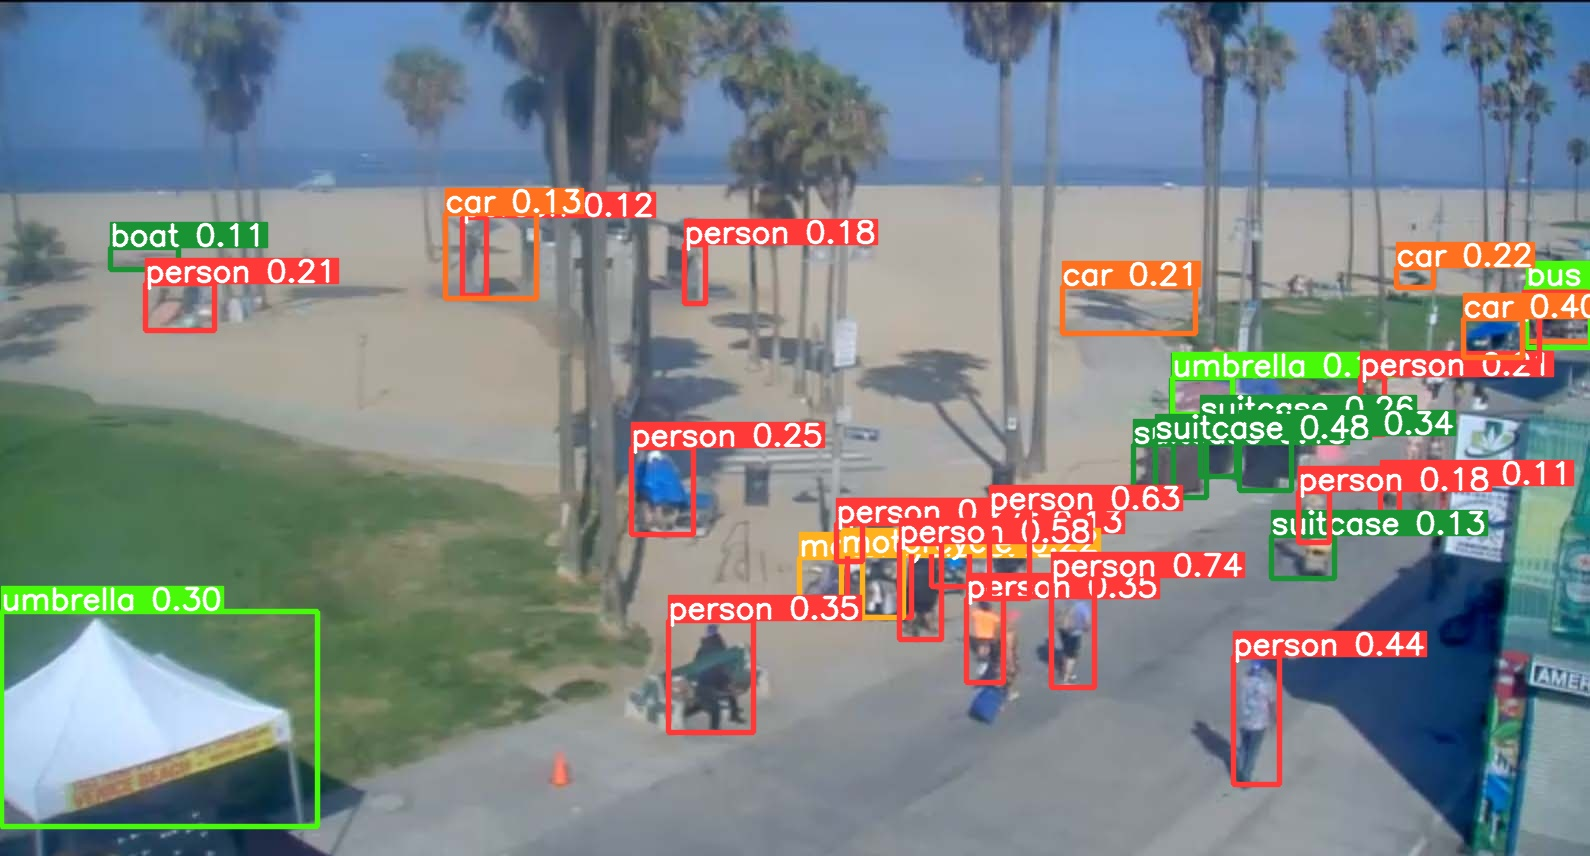

In [12]:
!rm -R yolov5/runs/detect/*
# Run YOLO to classify
!python /content/yolov5/detect.py --weights /content/yolov5/yolov5s.pt --img 1024 --iou 0.25 --conf 0.1 --source /content/venice_imgs/ --save-csv
img_path = "/content/yolov5/runs/detect/exp/sidewalk_1.jpg"
from IPython.display import Image
Image(filename = img_path, width=300)

In [18]:
import pandas as pd
df = pd.read_csv('/content/yolov5/runs/detect/exp/predictions.csv', names=['file_name', 'item', 'confidence'])
df.tail(10)

,file_name,item,confidence
450,sidewalk_9.jpg,person,0.49
451,sidewalk_9.jpg,person,0.52
452,sidewalk_9.jpg,person,0.55
453,sidewalk_9.jpg,person,0.55
454,sidewalk_9.jpg,person,0.55
455,sidewalk_9.jpg,person,0.55
456,sidewalk_9.jpg,person,0.56
457,sidewalk_9.jpg,person,0.68
458,sidewalk_9.jpg,person,0.70
459,sidewalk_9.jpg,umbrella,0.71


In [20]:
new_cols = list(df.item.unique())
new_cols

['suitcase',
 'car',
 'person',
 'boat',
 'motorcycle',
 'umbrella',
 'bus',
 'bicycle',
 'dog',
 'truck',
 'backpack',
 'bench',
 'skis',
 'bird',
 'train',
 'horse',
 'traffic light',
 'stop sign']

In [19]:
cnt_df = df.groupby(['file_name', 'item']).size().reset_index(name="count")
print(cnt_df)

         file_name           item  count
0   sidewalk_1.jpg           boat      1
1   sidewalk_1.jpg            bus      1
2   sidewalk_1.jpg            car      5
3   sidewalk_1.jpg     motorcycle      2
4   sidewalk_1.jpg         person     17
..             ...            ...    ...
57  sidewalk_9.jpg         person     40
58  sidewalk_9.jpg      stop sign      1
59  sidewalk_9.jpg       suitcase      1
60  sidewalk_9.jpg  traffic light      3
61  sidewalk_9.jpg       umbrella      3

[62 rows x 3 columns]


In [21]:
final_df = cnt_df.pivot(index='file_name', columns='item', values='count').fillna(0).astype(int).reset_index()
final_df

item,file_name,backpack,bench,bicycle,bird,...,suitcase,traffic light,train,truck,umbrella
0,sidewalk_1.jpg,0,0,0,0,...,6,0,0,0,2
1,sidewalk_10.jpg,0,0,2,0,...,1,0,0,0,0
2,sidewalk_2.jpg,1,1,0,0,...,2,0,0,1,4
3,sidewalk_3.jpg,0,0,1,0,...,0,0,0,0,4
4,sidewalk_4.jpg,1,0,1,0,...,0,0,0,0,5
5,sidewalk_5.jpg,0,2,2,0,...,0,0,0,0,4
6,sidewalk_6.jpg,0,0,2,0,...,0,0,0,0,6
7,sidewalk_7.jpg,1,0,0,2,...,2,0,1,0,5
8,sidewalk_8.jpg,0,0,0,0,...,0,0,1,0,3
9,sidewalk_9.jpg,0,0,0,0,...,1,3,0,0,3


In [22]:
final_df.to_csv('/content/assignment_5.csv', index=False)